# Titanic Survived project

Name : Parth Gadhvi

Batch: DS2307


Project Description: The Titanic Problem is a data analysis and predictive modeling challenge centered around the tragic sinking of the supposedly 'Unsinkable' ship Titanic in early 1912. This problem provides a dataset containing various details about passengers, including their age, gender, number of siblings, embarkation points, and their survival outcome. The objective is to create a predictive model capable of determining whether an arbitrary Titanic passenger would have survived the disaster based on these provided features.

Variables in Dataset:

PassengerId: A unique identifier assigned to each passenger.

Survived: Indicates whether a passenger survived the sinking of the Titanic. (0 = No, 1 = Yes)

Pclass: The passenger's ticket class. (1 = 1st class, 2 = 2nd class, 3 = 3rd class)

Name: The name of the passenger.

Sex: The gender of the passenger. (Male or Female)

Age: The age of the passenger in years.

SibSp: The number of siblings or spouses the passenger had aboard the Titanic.

Parch: The number of parents or children the passenger had aboard the Titanic.

Ticket: The ticket number.

Fare: The fare or price paid for the ticket.

Cabin: The cabin number.

Embarked: The port of embarkation for the passenger. (C = Cherbourg, Q = Queenstown, S = Southampton)

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading dataset
df = pd.read_csv('titanic .trains.csv')
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#checking the shape of dataset
print("There are {} rows and {} columns respectively present in the dataset.".format(*df.shape))

There are 891 rows and 13 columns respectively present in the dataset.


In [4]:
# checking columns in Dataset
print("These are the columns present in the dataset:\n", df.columns)

These are the columns present in the dataset:
 Index(['Unnamed: 0', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Observation: We have 12 columns in our dataset. One column is our target variable contain categorical data

In [5]:
# statistical info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    int64  
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          714 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Cabin        204 non-null    object 
 12  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [6]:
# statistical Summary
df.describe()

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,445.000000,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,890.000000,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Observations

Here we can clearly see that there are 2 columns contains float64, 5 columns contains int64 and 5 columns contains object values.

Memory Usage 83.7+ KB

In [7]:
#checking for Missing values
df.isnull().sum()

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

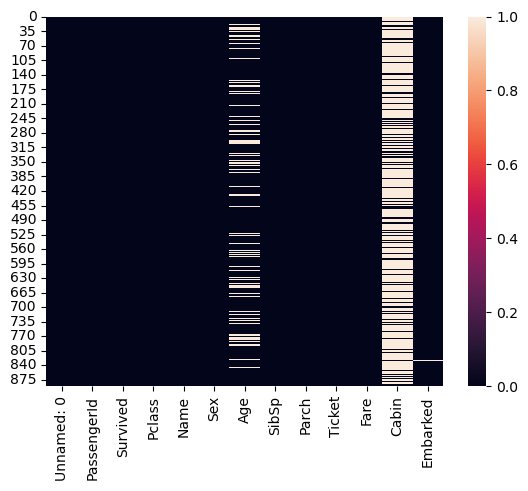

In [8]:
#Visualizing with heatmap
sns.heatmap(df.isnull())
plt.show()

Observations:

We can clearly see there are missing values in Age, Cabin and Embarked column

We can see that Cabin has maximum missing values so we will drop the Cabin column

Few columns have inappropriate data types.

In [9]:
# Dropping cabin column as most of the values are missing in the dataset
# PassegerId is the same as the index number and it isnot relevant to survival rate as well as our Name Column
df.drop(columns=['Cabin','PassengerId','Name'], inplace=True)

In [10]:
    #Handling Missing Values for Age Column
df['Age'].fillna(df['Age'].mean(),inplace=True)

# Impute missing values for Embarked Column
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

<AxesSubplot:>

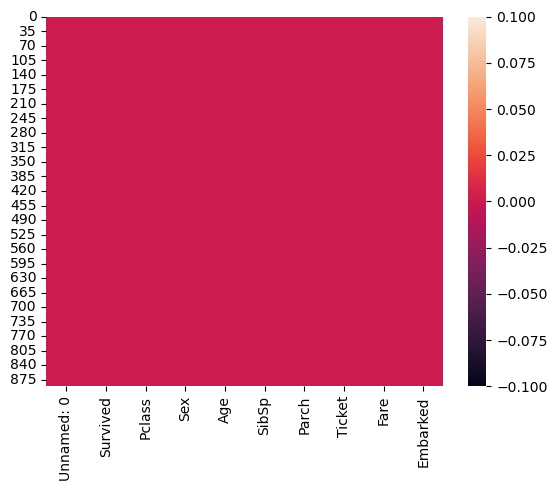

In [11]:
# Visualise it
sns.heatmap(df.isnull())

Observations: We have handled all the missing Values in the dataframe

In [12]:
#checking unique values in the dataset
df.nunique()

Unnamed: 0    891
Survived        2
Pclass          3
Sex             2
Age            89
SibSp           7
Parch           7
Ticket        681
Fare          248
Embarked        3
dtype: int64

Observations: These are unique values in each column in our dataset.

Columns Types

Numerical column: Age, Fare
    
Categorical column: Survived, Pclass,Sex, Sibsp, Parch, Embarked
    
Mixed column: Ticket

## Univariate Analysis

### Numerical Columns

In [13]:
#Handling  Age
df['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot:ylabel='Density'>

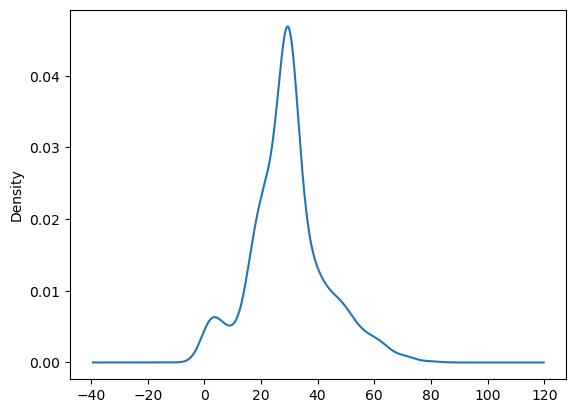

In [14]:
df['Age'].plot(kind='kde')

In [15]:
print("Skewness :",df['Age'].skew())
print("Kurtosis :",df['Age'].kurt())

Skewness : 0.4344880940129925
Kurtosis : 0.9662793026645233


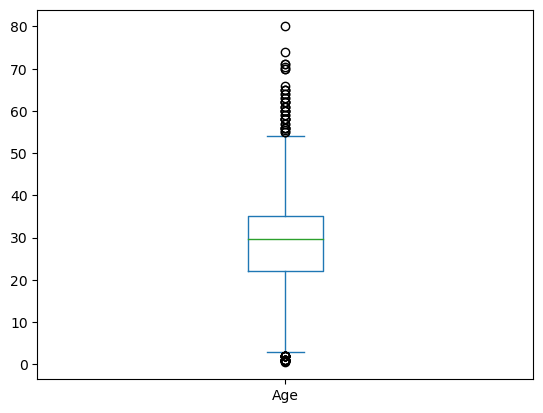

In [16]:
#checking for outliers
df['Age'].plot(kind='box')
plt.show()

In [17]:
#analysis whether the outliers are valid or invalid
df[df['Age']>65]

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
33,33,0,2,male,66.0,0,0,C.A. 24579,10.5000,S
96,96,0,1,male,71.0,0,0,PC 17754,34.6542,C
116,116,0,3,male,70.5,0,0,370369,7.7500,Q
493,493,0,1,male,71.0,0,0,PC 17609,49.5042,C
630,630,1,1,male,80.0,0,0,27042,30.0000,S
672,672,0,2,male,70.0,0,0,C.A. 24580,10.5000,S
745,745,0,1,male,70.0,1,1,WE/P 5735,71.0000,S
851,851,0,3,male,74.0,0,0,347060,7.7750,S


In [18]:
df[df['Age']<5]

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
7,7,0,3,male,2.00,3,1,349909,21.0750,S
10,10,1,3,female,4.00,1,1,PP 9549,16.7000,S
16,16,0,3,male,2.00,4,1,382652,29.1250,Q
43,43,1,2,female,3.00,1,2,SC/Paris 2123,41.5792,C
63,63,0,3,male,4.00,3,2,347088,27.9000,S
78,78,1,2,male,0.83,0,2,248738,29.0000,S
119,119,0,3,female,2.00,4,2,347082,31.2750,S
164,164,0,3,male,1.00,4,1,3101295,39.6875,S
171,171,0,3,male,4.00,4,1,382652,29.1250,Q
172,172,1,3,female,1.00,1,1,347742,11.1333,S


Observations:

Age is almost normally distributed and has heavier tails compared to a normal distribution.

There are some outliers. But we will not consider them as outliers because the data is valid

In [19]:
#Fare Column
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot:ylabel='Density'>

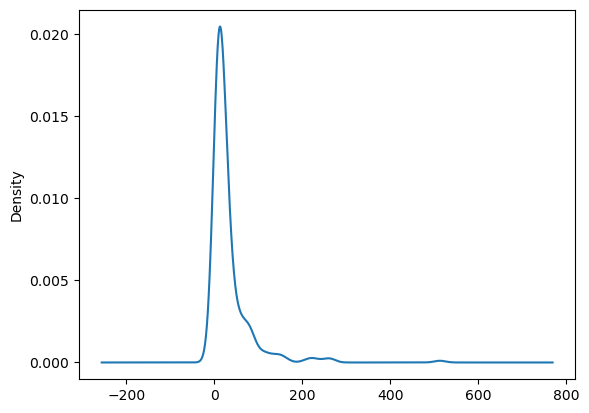

In [20]:
df['Fare'].plot(kind='kde')

In [21]:
print("Skewness :",df['Fare'].skew())
print("Kurtosis :",df['Fare'].kurt())

Skewness : 4.787316519674893
Kurtosis : 33.39814088089868


Observations: Considering the skewness and kurtosis values, it's evident that the 'Fare' distribution is strongly positively skewed, featuring a prolonged right tail and exceptionally heavy tails when compared to a typical normal distribution.

<AxesSubplot:>

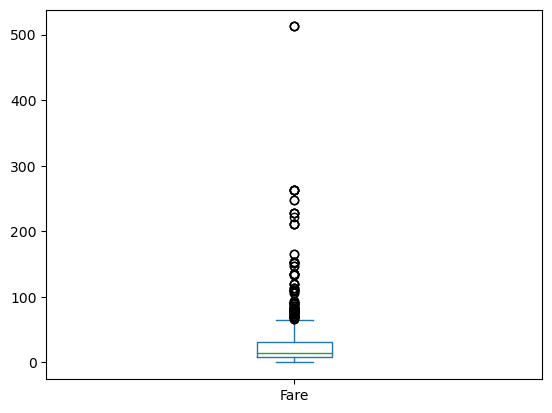

In [22]:
df['Fare'].plot(kind='box')

In [23]:
df[df['Fare'] > 250]

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
27,27,0,1,male,19.0,3,2,19950,263.0000,S
88,88,1,1,female,23.0,3,2,19950,263.0000,S
258,258,1,1,female,35.0,0,0,PC 17755,512.3292,C
311,311,1,1,female,18.0,2,2,PC 17608,262.3750,C
341,341,1,1,female,24.0,3,2,19950,263.0000,S
438,438,0,1,male,64.0,1,4,19950,263.0000,S
679,679,1,1,male,36.0,0,1,PC 17755,512.3292,C
737,737,1,1,male,35.0,0,0,PC 17755,512.3292,C
742,742,1,1,female,21.0,2,2,PC 17608,262.3750,C


Observations:

The data is highly(positively) skewed

Fare column actually contains the group fare and not the individual fare

We need to create a new column called individual fare

## Categorical Column

Unique values present in Survived : 2
0    549
1    342
Name: Survived, dtype: int64


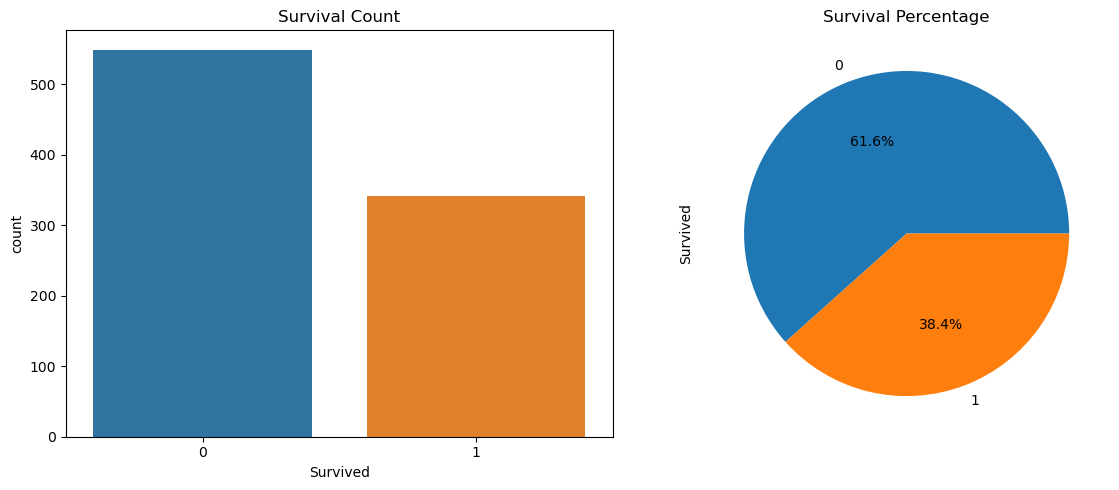

In [24]:
#survived columns

print('Unique values present in Survived :', len(df['Survived'].value_counts()))
print(df['Survived'].value_counts())

# Checking the Survived
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x='Survived', data=df, ax=axes[0])
axes[0].set_title("Survival Count")

# Checking the Survived percentage
df['Survived'].value_counts().plot(kind='pie', autopct='%0.1f%%', ax=axes[1])
axes[1].set_title("Survival Percentage")
plt.tight_layout()
plt.show()

Obseration:

We can clearly visiualize that Survived colum has 2 unique values which are 0 and 1, 0 represent died and 1 represent survived.

More than 61% people died in the incident.

No Null Values present.

Unique values present in Pclass : 3
3    491
1    216
2    184
Name: Pclass, dtype: int64


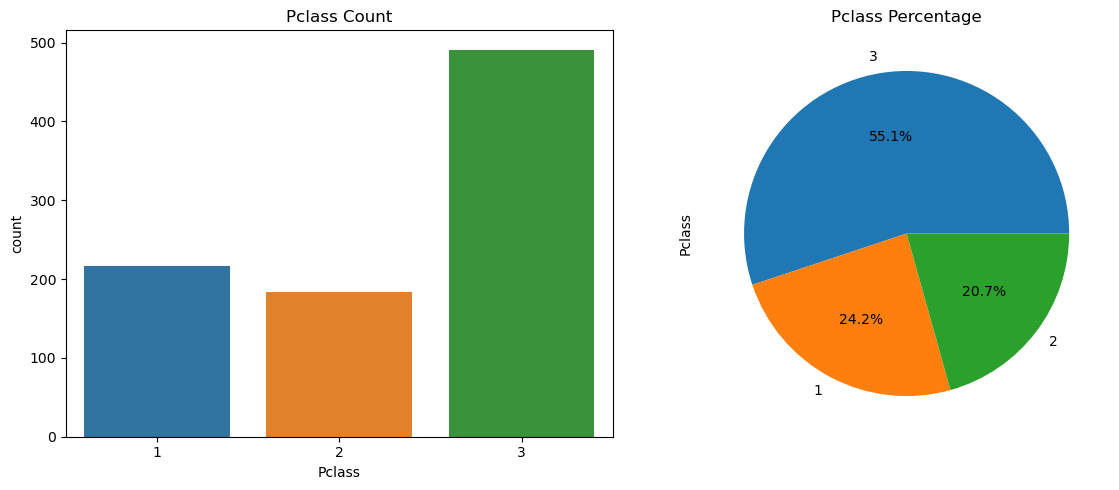

In [25]:
#Pclass Column
print('Unique values present in Pclass :', len(df['Pclass'].value_counts()))
print(df['Pclass'].value_counts())

#Plot the first countplot on the first subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x='Pclass', data=df, ax=axes[0])
axes[0].set_title("Pclass Count")

# Plot the second pie chart on the second subplot
df['Pclass'].value_counts().plot(kind='pie', autopct='%0.1f%%', ax=axes[1])
axes[1].set_title("Pclass Percentage")

plt.tight_layout()
plt.show()

Observations:

The dataset contains three distinct values for passenger class: PClass 1, PClass 2, and PClass 3.

PClass 3 had the highest passenger representation, accounting for 55.1% of the total passengers.

PClass 1 had a higher passenger count at 24.2% compared to PClass 2, which had 20.7% of the total passengers.

Unique values present in Sex : 2
male      577
female    314
Name: Sex, dtype: int64


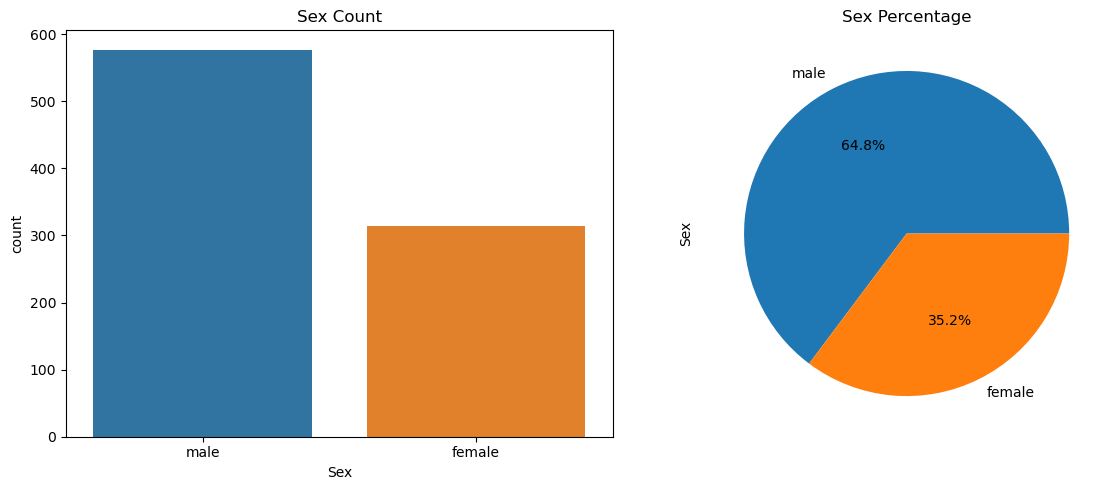

In [26]:
# Sex Column
print('Unique values present in Sex :', len(df['Sex'].value_counts()))
print(df['Sex'].value_counts())

#Plot the first countplot on the first subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x='Sex', data=df, ax=axes[0])
axes[0].set_title("Sex Count")

# Plot the second pie chart on the second subplot
df['Sex'].value_counts().plot(kind='pie', autopct='%0.1f%%', ax=axes[1])
axes[1].set_title("Sex Percentage")

plt.tight_layout()
plt.show()

Observations:

In the dataset, there are two distinct values for gender: 'male' and 'female.'

Males accounted for the majority, comprising 64% of the passengers, while females made up 35.2% of the total passengers.

Unique values present in SibSp : 7
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


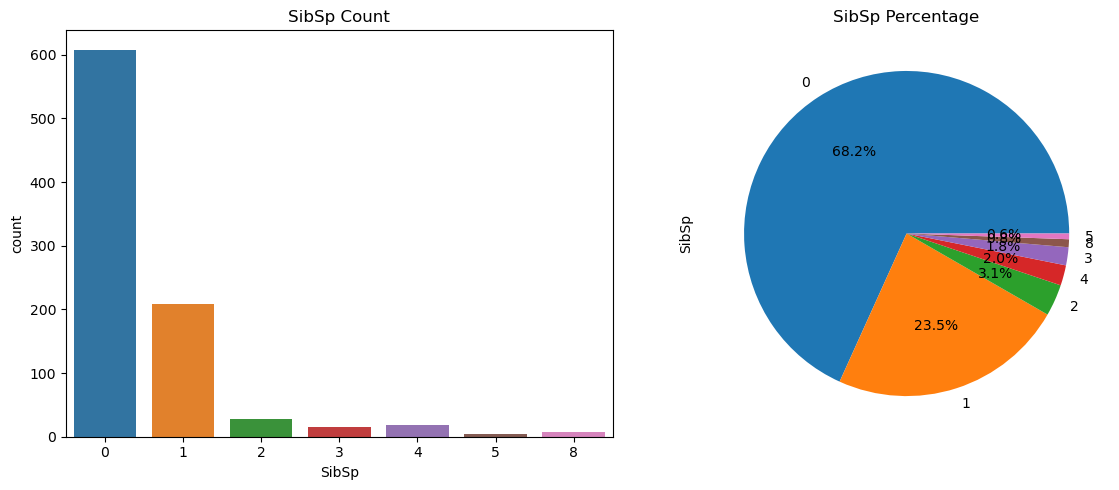

In [27]:
# SibSp Column
print('Unique values present in SibSp :', len(df['SibSp'].value_counts()))
print(df['SibSp'].value_counts())

#Plot the first countplot on the first subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x='SibSp', data=df, ax=axes[0])
axes[0].set_title("SibSp Count")

# Plot the second pie chart on the second subplot
df['SibSp'].value_counts().plot(kind='pie', autopct='%0.1f%%', ax=axes[1])
axes[1].set_title("SibSp Percentage")

plt.tight_layout()
plt.show()

Observations:

The majority of passengers traveled alone, representing the highest count.

The second-highest count of passengers was observed among those traveling with one sibling or spouse.

The count of passengers traveling with two siblings or spouses ranked third in terms of frequency.

Unique values present in Parch : 7
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


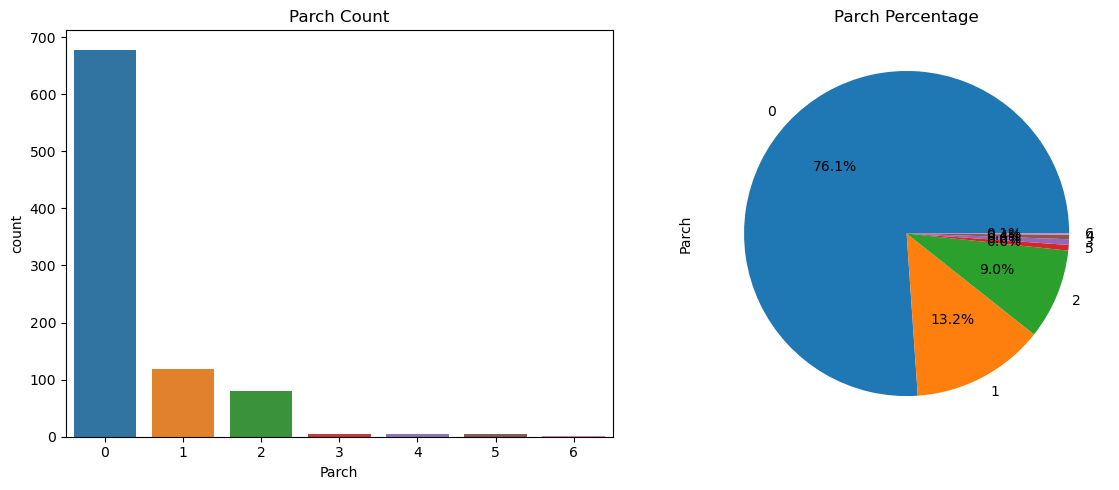

In [28]:
# Parch Column
print('Unique values present in Parch :', len(df['Parch'].value_counts()))
print(df['Parch'].value_counts())

#Plot the first countplot on the first subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x='Parch', data=df, ax=axes[0])
axes[0].set_title("Parch Count")

# Plot the second pie chart on the second subplot
df['Parch'].value_counts().plot(kind='pie', autopct='%0.1f%%', ax=axes[1])
axes[1].set_title("Parch Percentage")

plt.tight_layout()
plt.show()

Observation:

The most common scenario in the column involves passengers traveling alone, followed by those traveling with one parent or child, and then by those traveling with two parents or children.

The 'Parch' and 'SibSp' columns can be combined to create a new column called 'family_size as this two columns contain family size details.

Unique values present in Embarked : 3
S    646
C    168
Q     77
Name: Embarked, dtype: int64


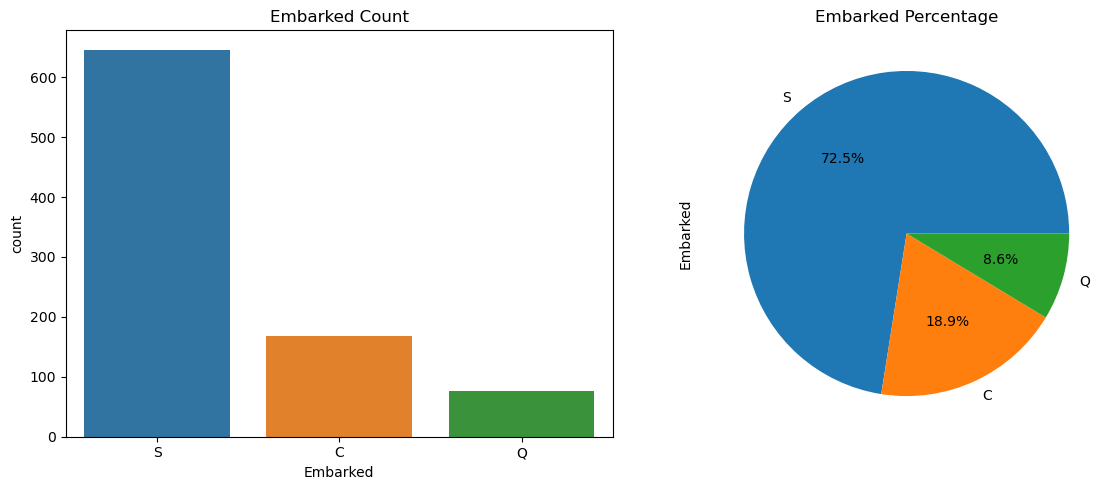

In [29]:
# Embarked Column
print('Unique values present in Embarked :', len(df['Embarked'].value_counts()))
print(df['Embarked'].value_counts())

#Plot the first countplot on the first subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x='Embarked', data=df, ax=axes[0])
axes[0].set_title("Embarked Count")

# Plot the second pie chart on the second subplot
df['Embarked'].value_counts().plot(kind='pie', autopct='%0.1f%%', ax=axes[1])
axes[1].set_title("Embarked Percentage")

plt.tight_layout()
plt.show()

Observations: The highest number of passengers embarked from Southampton (S), followed by Cherbourg (C), while Queenstown (Q) had the lowest passenger count. This pattern could be attributed to Southampton being the ship's initial departure point.

## Mixed Columns

In [30]:
#Ticket columns is our mixed column so we will drop the column
df.drop(['Ticket'],axis=1,inplace=True)

## Bivariate Analysis

Pclass,1,2,3
Survived,,,
0,37.04,52.72,75.76
1,62.96,47.28,24.24


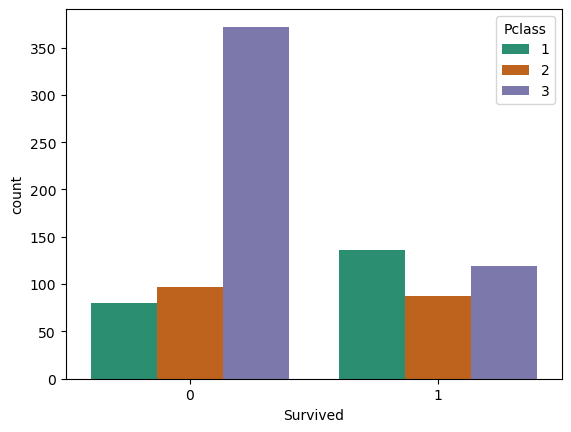

In [31]:
#Survived and Pclass
sns.countplot(x='Survived', data=df, hue='Pclass', palette='Dark2')
(pd.crosstab(df['Survived'],df['Pclass'], normalize='columns')*100).round(2)


Observation:

Pclass 3 had the highest risk, with a 75% mortality rate and only a 24% survival rate.

Pclass 1 was the safest, with 62% of its passengers surviving and a death rate of 37%.

Sex,female,male
Survived,,
0,25.8,81.11
1,74.2,18.89


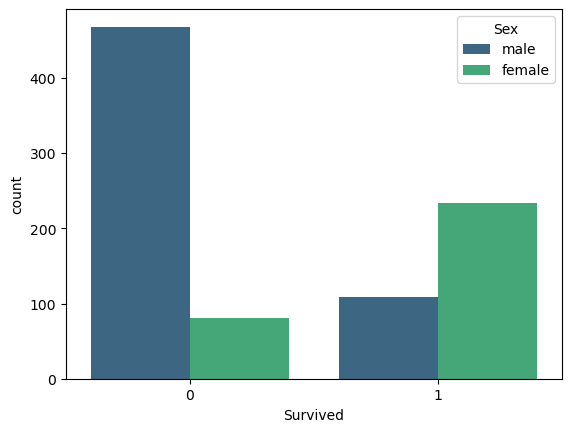

In [32]:
#Survived and Sex
sns.countplot(x='Survived', data=df, hue='Sex', palette='viridis')
(pd.crosstab(df['Survived'],df['Sex'], normalize='columns')*100).round(2)

Observation:

The visualization makes it evident that the survival rate among females is significantly higher, at 74%, in stark contrast to males, where the rate is only 18%.

Embarked,C,Q,S
Survived,,,
0,44.64,61.04,66.1
1,55.36,38.96,33.9


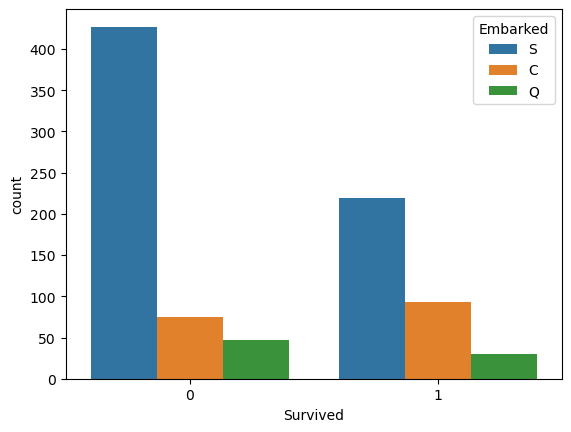

In [33]:
#Survived and Embarked
sns.countplot(x='Survived', data=df, hue='Embarked')
(pd.crosstab(df['Survived'],df['Embarked'], normalize='columns')*100).round(2)

Observation: It's evident from the data that the survival rate of passengers who embarked from Cherbourg is notably higher than those from Queenstown and Southampton. This suggests that passengers boarding from Cherbourg may predominantly belong to Pclass 1 or be of the female gender. Further analysis can provide more insights into this pattern.

Embarked,C,Q,S
Sex,,,
female,43.45,46.75,31.73
male,56.55,53.25,68.27


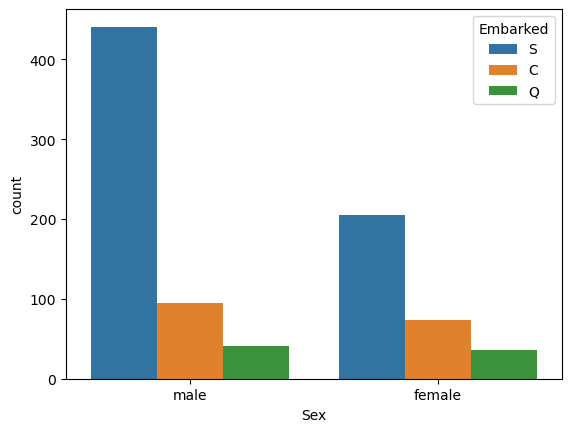

In [34]:
# Sex and Embarked
sns.countplot(x='Sex', data=df, hue='Embarked',)
(pd.crosstab(df['Sex'],df['Embarked'], normalize='columns')*100).round(2)

Embarked,C,Q,S
Pclass,,,
1,50.60,2.60,19.97
2,10.12,3.90,25.39
3,39.29,93.51,54.64


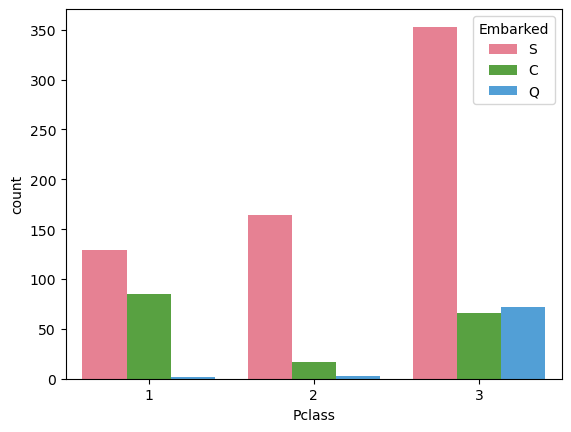

In [35]:
#PClass and Embarked
sns.countplot(x='Pclass', data=df, hue='Embarked', palette='husl')
(pd.crosstab(df['Pclass'],df['Embarked'], normalize='columns')*100).round(2)

Observation:

Based on the provided information, it is evident that the largest group of passengers who embarked from Cherbourg belonged to PClass 1. This explains why the survival rate for this group is significantly higher compared to Queenstown and Southampton.

Additionally, it's noteworthy that the majority of passengers who boarded from Queenstown were in PClass 3, aligning with our observation that the highest mortality rate is associated with PClass 3.

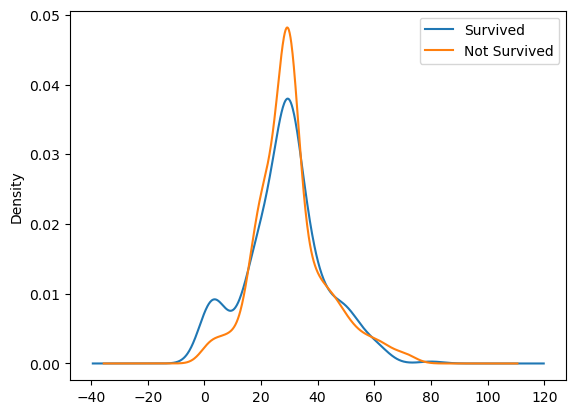

In [36]:
#survived and Age
df[df['Survived'] == 1]['Age'].plot(kind='kde',label='Survived')
df[df['Survived'] == 0]['Age'].plot(kind='kde',label='Not Survived')

plt.legend()
plt.show()

In [37]:
df[df['Pclass']==1]['Age'].mean()

37.04811819172115

Observations:

It's evident that the age group from 0 to 10 exhibits a notably high survival rate.

In the age range from 10 to 40, the mortality rate surpasses the survival rate.

Between the ages of 40 and 50, we observe a relatively higher survival rate, possibly due to the presence of Pclass 1 passengers.

Beyond the age of 60 and above, the mortality rate tends to be higher.

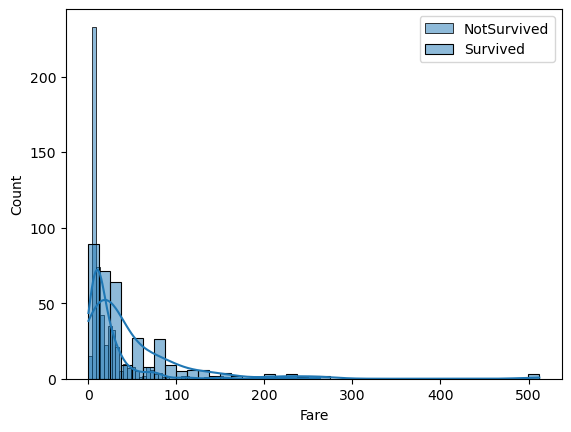

In [38]:
#survived by fare
sns.histplot(df['Fare'][df['Survived']==0],kde=True, label='NotSurvived')
sns.histplot(df['Fare'][df['Survived']==1],kde=True, label='Survived')
plt.legend()
plt.show()

Observation:

Passengers with higher fares exhibit a significantly greater survival rate compared to those with lower fares.

## Multivariate Analysis

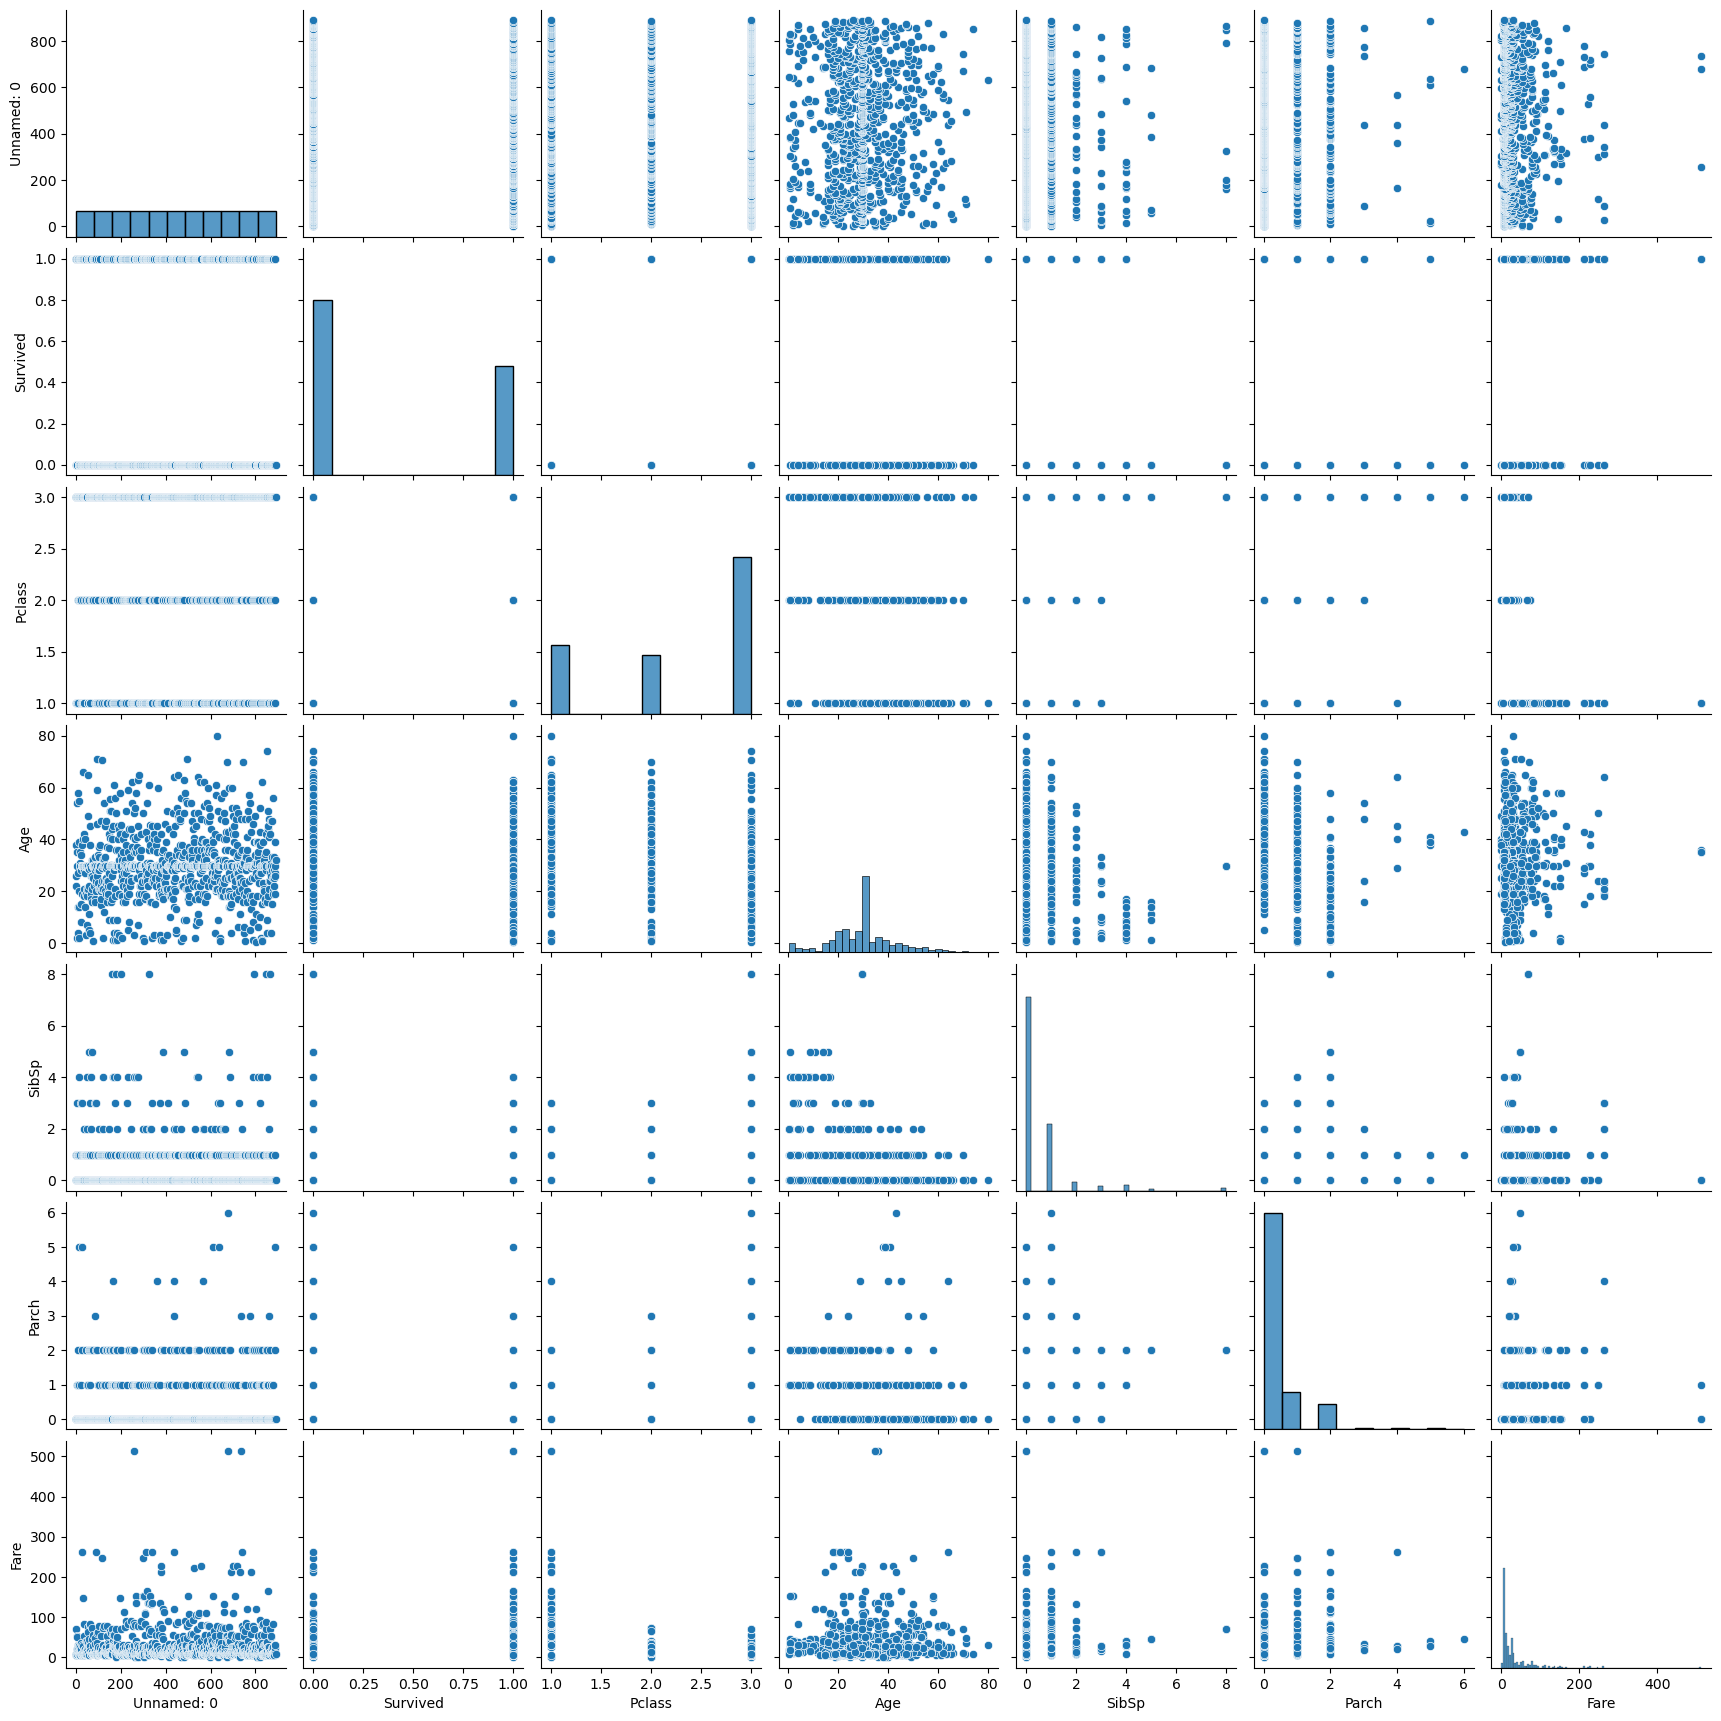

In [39]:
sns.pairplot(df)

# Feature Engineer
SibSp & Parch Column

In [40]:
#Creating a new column by the name of family which will be the sum of SibSp and Parch cols
df['family_size'] = df['SibSp'] + df['Parch'] + 1
df

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_size
0,0,0,3,male,22.000000,1,0,7.2500,S,2
1,1,1,1,female,38.000000,1,0,71.2833,C,2
2,2,1,3,female,26.000000,0,0,7.9250,S,1
3,3,1,1,female,35.000000,1,0,53.1000,S,2
4,4,0,3,male,35.000000,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.000000,0,0,13.0000,S,1
887,887,1,1,female,19.000000,0,0,30.0000,S,1
888,888,0,3,female,29.699118,1,2,23.4500,S,4
889,889,1,1,male,26.000000,0,0,30.0000,C,1


In [41]:
# Now we will enginer a new feature by the name of family type
# 1 -> alone
# 2-4 -> small
# >5 -> large

def transform_family_size(num):
    if num == 1:
        return 'alone'
    elif num>1 and num <5:
        return "small"
    else:
        return "large"

In [42]:
df['family_type'] = df['family_size'].apply(transform_family_size)
df

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_size,family_type
0,0,0,3,male,22.000000,1,0,7.2500,S,2,small
1,1,1,1,female,38.000000,1,0,71.2833,C,2,small
2,2,1,3,female,26.000000,0,0,7.9250,S,1,alone
3,3,1,1,female,35.000000,1,0,53.1000,S,2,small
4,4,0,3,male,35.000000,0,0,8.0500,S,1,alone
...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.000000,0,0,13.0000,S,1,alone
887,887,1,1,female,19.000000,0,0,30.0000,S,1,alone
888,888,0,3,female,29.699118,1,2,23.4500,S,4,small
889,889,1,1,male,26.000000,0,0,30.0000,C,1,alone


In [43]:
#Dropping columns
df.drop(columns=['SibSp', 'Parch', 'family_size'],inplace=True)

family_type,alone,large,small
Survived,,,
0,69.65,83.87,42.12
1,30.35,16.13,57.88


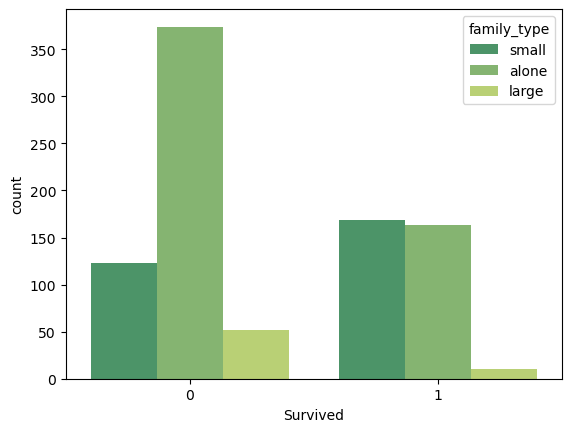

In [44]:
#survived by family type
sns.countplot(x='Survived', data=df, hue='family_type', palette='summer')
(pd.crosstab(df['Survived'],df['family_type'],normalize='columns')*100).round(2)

Observations:

Alone: Among passengers who traveled alone, without any family members onboard, approximately 30.4% survived, while 69.6% did not survive.

Large: For passengers who were part of large families, approximately 14.9% survived, while 85.1% did not survive.

Small: Among passengers who were part of medium-sized families, approximately 56.0% survived, while 44.0% did not survive.

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   Fare         891 non-null    float64
 6   Embarked     891 non-null    object 
 7   family_type  891 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


## Log transformation for uniform data distribution

<AxesSubplot:xlabel='Fare', ylabel='Density'>

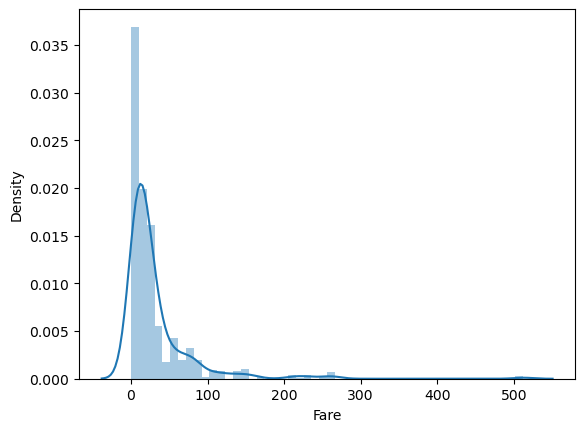

In [46]:
sns.distplot(df['Fare'],kde=True)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

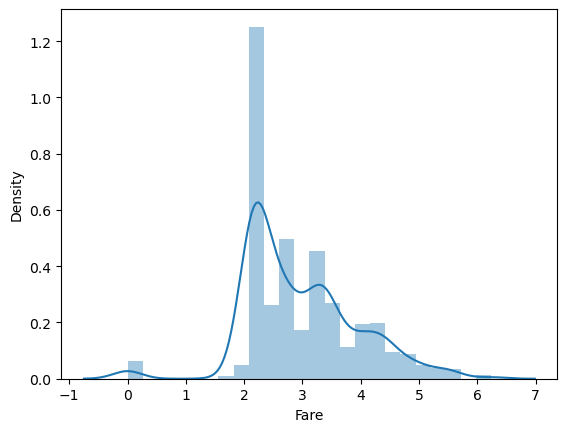

In [47]:
df['Fare'] = np.log(df['Fare']+1)
sns.distplot(df['Fare'])

### Label Encoding

In [48]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex', 'Embarked', 'family_type']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,Unnamed: 0,Survived,Pclass,Sex,Age,Fare,Embarked,family_type
0,0,0,3,1,22.0,2.110213,2,2
1,1,1,1,0,38.0,4.280593,0,2
2,2,1,3,0,26.0,2.188856,2,0
3,3,1,1,0,35.0,3.990834,2,2
4,4,0,3,1,35.0,2.202765,2,0


## Correlation Matrix

<AxesSubplot:>

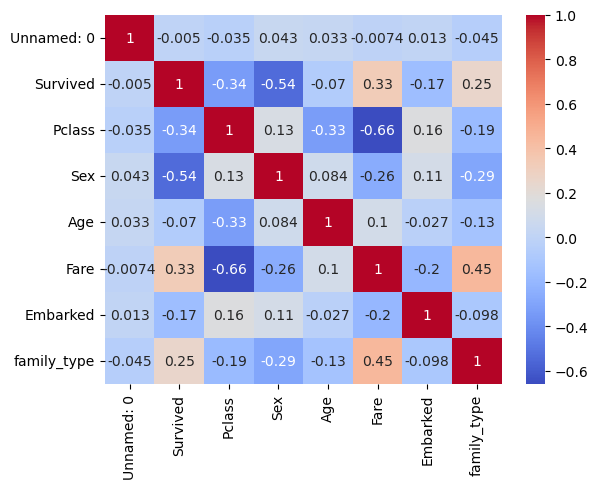

In [49]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [50]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Observation:

data is looks imbalanced as survived(0) shows 342 and not survived (1) shows 549

### Scaling data Using StandardScaler

In [51]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_to_scale =['Pclass','Age','Fare']
scaled_features = scaler.fit_transform(df[features_to_scale])
scaled_df = df.copy()
scaled_df[features_to_scale] = scaled_features

In [52]:
scaled_df

,Unnamed: 0,Survived,Pclass,Sex,Age,Fare,Embarked,family_type
0,0,0,0.827377,1,-0.592481,-0.879741,2,2
1,1,1,-1.566107,0,0.638789,1.361220,0,2
2,2,1,0.827377,0,-0.284663,-0.798540,2,0
3,3,1,-1.566107,0,0.407926,1.062038,2,2
4,4,0,0.827377,1,0.407926,-0.784179,2,0
...,...,...,...,...,...,...,...,...
886,886,0,-0.369365,1,-0.207709,-0.333698,2,0
887,887,1,-1.566107,0,-0.823344,0.487082,2,0
888,888,0,0.827377,0,0.000000,0.242007,2,2
889,889,1,-1.566107,1,-0.284663,0.487082,0,0


### Dividing Features and Label

In [53]:
X = scaled_df.drop('Survived', axis = 1)
y = scaled_df['Survived']

## Handling Imbalance Data Using SMOTE

In [54]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [55]:
y_resampled.value_counts()

0    549
1    549
Name: Survived, dtype: int64

Observations: We have balanced data now.

# Train Test Split

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify = y_resampled, random_state=42)


In [57]:
#Importing Required Libraries
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score,recall_score, f1_score
from sklearn.metrics import roc_auc_score,roc_curve

# Model Selection

## Logistic Regression with Hyperparameter Tuning

Logistic Regression with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.81       110
           1       0.79      0.85      0.82       110

    accuracy                           0.81       220
   macro avg       0.81      0.81      0.81       220
weighted avg       0.81      0.81      0.81       220

Cross-Validation Scores: [0.69832402 0.79213483 0.80337079 0.78089888 0.80898876]
Mean Cross-Validation Score: 0.776743456154667


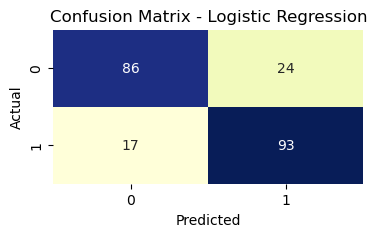

In [58]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create the Logistic Regression Classifier
LG = LogisticRegression()

# Create the grid search object
grid_search = GridSearchCV(LG, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the Logistic Regression Classifier with the best parameters
best_LG = LogisticRegression(**best_params)

# Fit the model on the training data
best_LG.fit(X_train, y_train)

# Make predictions on the test set
LG_y_pred = best_LG.predict(X_test)

print("Logistic Regression with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, LG_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_LG, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, LG_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## ROC AUC Curve

ROC AUC Score: 0.8881818181818182


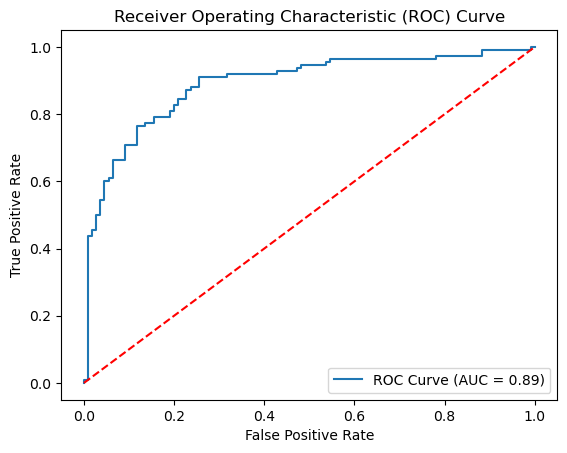

In [59]:
y_prob = best_LG.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Decision Tree Classifier with Hyperparameter Tuning

Decision Tree Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       110
           1       0.80      0.88      0.84       110

    accuracy                           0.83       220
   macro avg       0.83      0.83      0.83       220
weighted avg       0.83      0.83      0.83       220

Cross-Validation Scores: [0.68715084 0.80898876 0.81460674 0.78089888 0.85393258]
Mean Cross-Validation Score: 0.7891155608561923


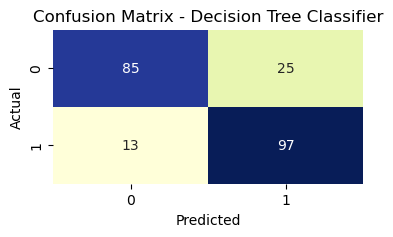

In [60]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the Decision Tree Classifier
dt = DecisionTreeClassifier()

# Create the grid search object
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the Decision Tree Classifier with the best parameters
best_dt = DecisionTreeClassifier(**best_params)

# Fit the model on the training data
best_dt.fit(X_train, y_train)

# Make predictions on the test set
dt_y_pred = best_dt.predict(X_test)

print("Decision Tree Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, dt_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_dt, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, dt_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## ROC AUC Curve

ROC AUC Score: 0.8902066115702479


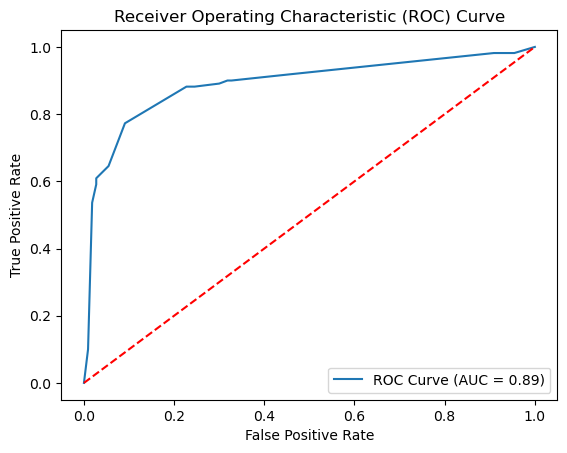

In [61]:
y_prob = best_dt.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Random Forest Classifier with Hyperparameter Tuning

Random Forest Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       110
           1       0.85      0.83      0.84       110

    accuracy                           0.84       220
   macro avg       0.84      0.84      0.84       220
weighted avg       0.84      0.84      0.84       220

Cross-Validation Scores: [0.73743017 0.80337079 0.87078652 0.81460674 0.83146067]
Mean Cross-Validation Score: 0.8115309773397777


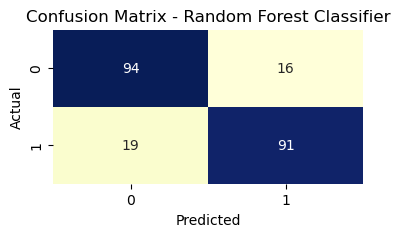

In [62]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the Random Forest Classifier
RF = RandomForestClassifier()

# Create the grid search object
grid_search = GridSearchCV(RF, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the Random Forest Classifier with the best parameters
best_RF = RandomForestClassifier(**best_params)

# Fit the model on the training data
best_RF.fit(X_train, y_train)

# Make predictions on the test set
RF_y_pred = best_RF.predict(X_test)

print("Random Forest Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, RF_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_RF, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, RF_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## ROC AUC Curve

ROC AUC Score: 0.9165289256198348


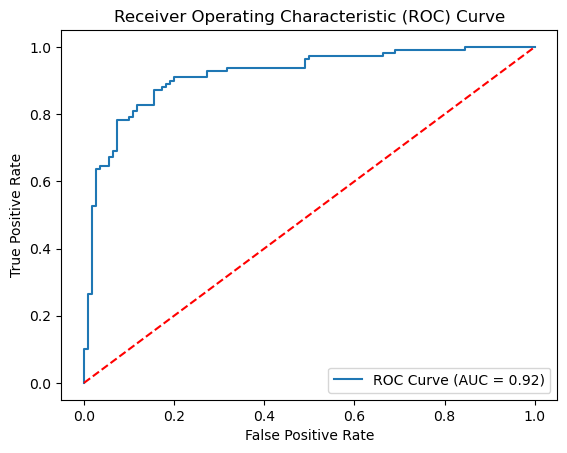

In [63]:
y_prob = best_RF.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## K Neighbour Classifier with Hyperparameter Tuning

K Neighbors Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.68      0.71       110
           1       0.71      0.77      0.74       110

    accuracy                           0.73       220
   macro avg       0.73      0.73      0.73       220
weighted avg       0.73      0.73      0.73       220

Cross-Validation Scores: [0.61452514 0.39325843 0.46629213 0.43820225 0.61235955]
Mean Cross-Validation Score: 0.5049274998430733


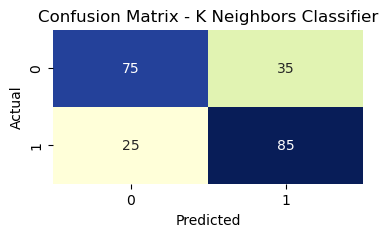

In [64]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Create the K Neighbors Classifier
KN = KNeighborsClassifier()

# Create the grid search object
grid_search = GridSearchCV(KN, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the K Neighbors Classifier with the best parameters
best_KN = KNeighborsClassifier(**best_params)

# Fit the model on the training data
best_KN.fit(X_train, y_train)

# Make predictions on the test set
KN_y_pred = best_KN.predict(X_test)

print("K Neighbors Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, KN_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_KN, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, KN_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - K Neighbors Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## ROC AUC Curve

ROC AUC Score: 0.7927272727272727


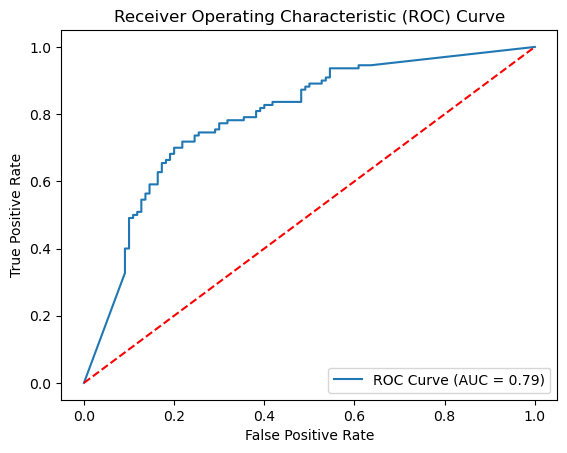

In [65]:
y_prob = best_KN.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Extra Tree Classifier with Hyperparameter Tuning

Extra Tree Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       110
           1       0.86      0.80      0.83       110

    accuracy                           0.84       220
   macro avg       0.84      0.84      0.84       220
weighted avg       0.84      0.84      0.84       220

Cross-Validation Scores: [0.79888268 0.81460674 0.84269663 0.80898876 0.83146067]
Mean Cross-Validation Score: 0.819327098110602


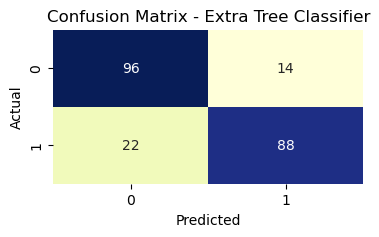

In [66]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the Extra Trees Classifier
ET = ExtraTreesClassifier()

# Create the grid search object
grid_search = GridSearchCV(ET, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_


# Create the Extra Trees Classifier with the best parameters
best_ET = ExtraTreesClassifier(**best_params)

# Fit the model on the training data
best_ET.fit(X_train, y_train)

# Make predictions on the test set
ET_y_pred = best_ET.predict(X_test)

print("Extra Tree Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, ET_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_ET, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, ET_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - Extra Tree Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### ROC AUC Curve

ROC AUC Score: 0.9189256198347109


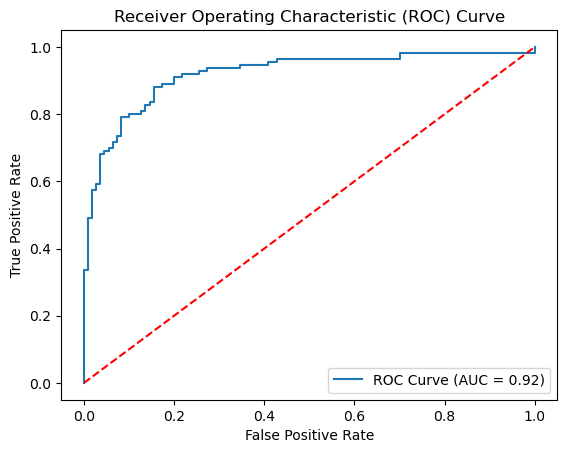

In [67]:
y_prob = best_ET.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Support Vector Classifier with Hyperparameter Tuning

Support Vector Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       110
           1       0.84      0.75      0.79       110

    accuracy                           0.80       220
   macro avg       0.81      0.80      0.80       220
weighted avg       0.81      0.80      0.80       220

Cross-Validation Scores: [0.80446927 0.80337079 0.78651685 0.75280899 0.78651685]
Mean Cross-Validation Score: 0.7867365513778168


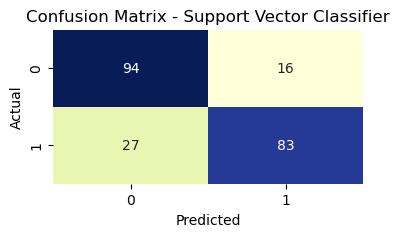

In [68]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Create the SVC
SV = SVC()

# Create the grid search object
grid_search = GridSearchCV(SV, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the SVC with the best parameters
best_SV = SVC(**best_params)

# Fit the model on the training data
best_SV.fit(X_train, y_train)

# Make predictions on the test set
SV_y_pred = best_SV.predict(X_test)

print("Support Vector Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, SV_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_SV, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, SV_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - Support Vector Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## ROC AUC curve

ROC AUC Score: 0.8911570247933884


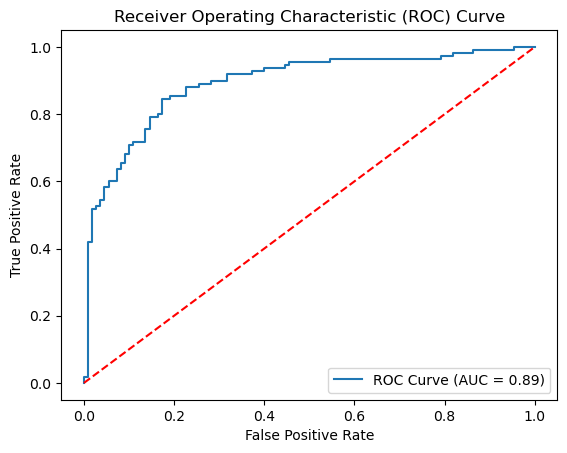

In [69]:
y_prob = best_SV.decision_function(X_test)

# Compute ROC AUC score
auc_score = roc_auc_score(y_test, y_prob)

print("ROC AUC Score:", auc_score)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## XGBoost Classifier with Hyperparameter Tuning

XGBoost Classifier :
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       110
           1       0.84      0.81      0.82       110

    accuracy                           0.83       220
   macro avg       0.83      0.83      0.83       220
weighted avg       0.83      0.83      0.83       220

Cross-Validation Scores: [0.83267457 0.81898396 0.89766043 0.89518717 0.90347028]
Mean Cross-Validation Score: 0.8695952811628332


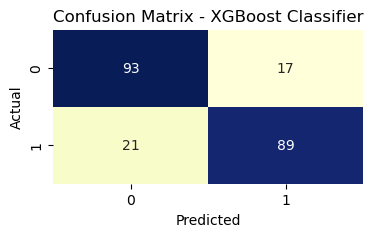

In [70]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create the XGBoost classifier
XGB = XGBClassifier()

# Create the grid search object
grid_search = GridSearchCV(XGB, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the XGBoost classifier with the best parameters
best_XGB = XGBClassifier(**best_params)

# Fit the model on the training data and make prediction on test data
best_XGB.fit(X_train, y_train)
XGB_y_pred = best_XGB.predict(X_test)


print("XGBoost Classifier :")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, XGB_y_pred))


# Cross-Validation Score
scores = cross_val_score(best_XGB, X, y, cv=5, scoring='roc_auc')
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, XGB_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - XGBoost Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## ROC AUC Curve

ROC AUC Score: 0.902809917355372


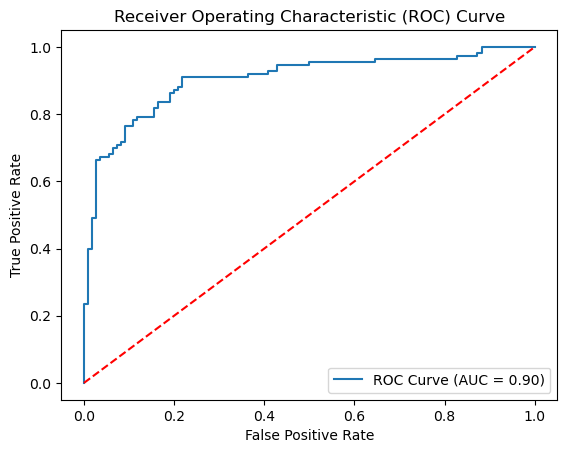

In [71]:
y_prob = best_XGB.predict_proba(X_test)[:, 1]

# Compute ROC AUC score
auc_score = roc_auc_score(y_test, y_prob)

print("ROC AUC Score:", auc_score)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Creating DataFrame of All the Models in Their descending Order

In [72]:
# Create a list of model names
model_names = ['Extra Tree Classifier', 'Support Vector Classifier', 'K Neighbour Classifier', 'Random Forest Classifier', 'Decision Tree Classifier', 'Logistic Regression','XGBoost Classifier']

# Create a list of models and their corresponding accuracy scores
models = [ET, SV, KN, RF, dt, LG]
accuracy_scores = [accuracy_score(y_test, ET_y_pred), accuracy_score(y_test, SV_y_pred), accuracy_score(y_test, KN_y_pred), accuracy_score(y_test, RF_y_pred), accuracy_score(y_test, dt_y_pred), accuracy_score(y_test, LG_y_pred),accuracy_score(y_test, XGB_y_pred)]

# Create a dataframe with model name and accuracy score
df = pd.DataFrame({'Model Name': model_names, 'Accuracy Score': accuracy_scores})

# Sort the dataframe by accuracy score in descending order
df = df.sort_values('Accuracy Score', ascending=False)

# Print the dataframe
df.index = range(1, len(df)+1)
print(df)

                  Model Name  Accuracy Score
1   Random Forest Classifier        0.840909
2      Extra Tree Classifier        0.836364
3   Decision Tree Classifier        0.827273
4         XGBoost Classifier        0.827273
5        Logistic Regression        0.813636
6  Support Vector Classifier        0.804545
7     K Neighbour Classifier        0.727273


# Save Best Model

In [73]:
import pickle
filename = 'RFClassifier.pkl'
pickle.dump(XGB, open(filename, 'wb'))